In [1]:
"""
kMeans 알고리즘 
 - 확인적 군집분석 방법
 - 계층적 군집분석법 보다 속도 빠름
 - 군집 수 k를 알고 있는 경우 이용
'''

from sklearn.cluster import KMeans # model 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd
from sklearn.cluster import KMeans # kMeans model
import matplotlib.pyplot as plt

iris = pd.read_csv("C:/Users/hyebin/Desktop/Python_ML/data/iris.csv")
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
irisDF = iris[['Sepal.Length', 'Petal.Length']]
irisDF.head()

,Sepal.Length,Petal.Length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [6]:
# kMeans model
model = KMeans(n_clusters=3, algorithm='auto') # k=3
model.fit(irisDF)

KMeans(n_clusters=3)

In [7]:
# kMeans model 에측치 
pred = model.predict(irisDF)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [8]:
print(type(pred))

<class 'numpy.ndarray'>


In [10]:
# 에측치 추가 
irisDF['predict'] = pred # column 추가 = numpy vecter 추가 가능 
irisDF

<ipython-input-10-b67952ba6ca7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  irisDF['predict'] = pred # column 추가 = numpy vecter 추가 가능


,Sepal.Length,Petal.Length,predict
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,1
147,6.5,5.2,2
148,6.2,5.4,2


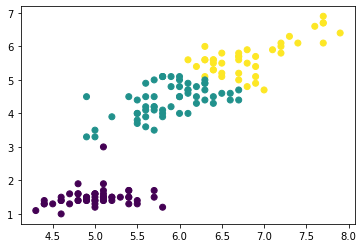

In [11]:
'''
시각화 - 에측치 이용 클러스터 색 적용 
'''
plt.scatter(irisDF['Sepal.Length'], irisDF['Petal.Length'],
            c=irisDF['predict'])
plt.show()


In [12]:
'''
center 추가
'''

# 군집 중앙값  
centers = model.cluster_centers_
print(centers)

[[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]


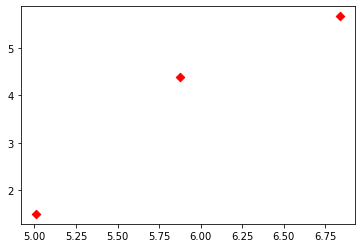

In [13]:
# 중앙값 시각화 
plt.scatter(centers[:,0], centers[:, 1], marker='D', c='r')
plt.show() # marker='D' = Diamond


[566.4937333333332, 112.99207175925925, 53.80997864410694, 34.31702077922079, 25.634064509564507, 21.90801299871301, 18.484788106630223, 15.030227272727288, 13.42855139908401, 11.89970744768527]


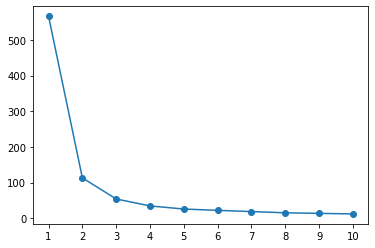

'\n급격히 하강한 후 3-5 사이에서 변화의 폭이 완만하다.\n3-5사이의 클러스터로 분류하는 것이 적절하다고 판단  \n'

In [14]:

'''
최적의 클러스터 수
'''

irisDF2 = iris[['Sepal.Length', 'Petal.Length']]

size = range(1,11)
inertia = [] 
'''
inertia value[인너샤 value] 
 - 군집의 응집도를 나타내는 수치
 - 수치가 작을 수록 군집의 응집도가 좋다고 평가 
 - 중심점(centroid)에서 군집(cluster)내 포인트간의 거리 제곱의 합의 값 
'''
for k in size :
    model = KMeans(n_clusters=k)
    model.fit(irisDF2)
    inertia.append(model.inertia_)
    
print(inertia)

plt.plot(size, inertia, '-o')
plt.xticks(size) # size를 x의 축눈금으로 표시 
plt.show()
'''
급격히 하강한 후 3-5 사이에서 변화의 폭이 완만하다.
3-5사이의 클러스터로 분류하는 것이 적절하다고 판단  
'''